In [1]:
import pandas as pd

In [118]:
#df = pd.read_csv('data/lcogt-photometry/Measurements.csv')
df = pd.read_csv('observations/LCOGT/K2-19_photometry-25.csv')

outputdir = 'observations/LCOGT/fits2/'

KW = """
SITEID FRAMENUM MOLTYPE MOLNUM MOLFRNUM FILTER INSSTATE GAIN RDNOISE DARKCURR 
SATURATE MAXLIN TRACKNUM REQNUM MOLUID WMSSKYBR AIRMASS MOONDIST FOCPOSN
""".split()

def scrape_headers(outputdir, label):
    d = {}
    f = os.path.join(outputdir,row.Label)
    with fits.open(f) as hduL:  
        for _KW in KW:
            d[_KW] = hduL[0].header[_KW]
            d['Label'] = row.Label
    return d

import os
dL = []
for i,row in df.iterrows():
    dL.append(scrape_headers(outputdir,df.Label))

dL = pd.DataFrame(dL)

df = pd.merge(df,dL,on='Label')

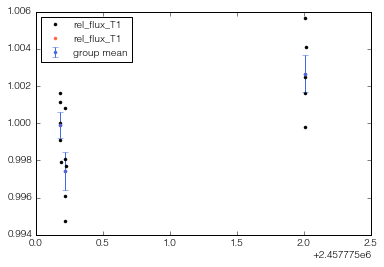

In [132]:
cut = df.query('FILTER=="gp"')
#ratio = cut['Source-Sky_T1']/cut['Source-Sky_C3']
#plot(cut.JD_UTC,ratio/ratio.median(),'.')
plot(cut.JD_UTC,cut.rel_flux_T1/cut.rel_flux_T1.median(),'.')
g = cut.groupby('MOLUID')
g_T1 = g['rel_flux_T1']
norm = cut.rel_flux_T1.mean()
t = g['JD_UTC'].mean()
y = g['rel_flux_T1'].mean()/norm
y_std = g['rel_flux_T1'].std()/norm
y_count = g['rel_flux_T1'].count()
y_stderr = y_std / np.sqrt(y_count)


plot(t,y,'.')
errorbar(t,y,yerr=y_stderr,label='group mean',fmt='.')
legend(loc='best')

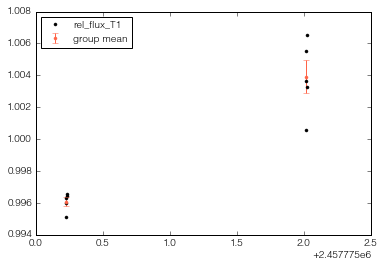

In [139]:
cut = df.query('FILTER=="ip"')
#ratio = cut['Source-Sky_T1']/cut['Source-Sky_C3']
#plot(cut.JD_UTC,ratio/ratio.median(),'.')
g = cut.groupby('MOLUID')
g_T1 = g['rel_flux_T1']
norm = cut.rel_flux_T1.mean()
t = g['JD_UTC'].mean()
y = g['rel_flux_T1'].mean()/norm
y_std = g['rel_flux_T1'].std()/norm
y_count = g['rel_flux_T1'].count()
y_stderr = y_std / np.sqrt(y_count)

plot(cut.JD_UTC, cut.rel_flux_T1/norm,'.')
errorbar(t,y,yerr=y_stderr,label='group mean',fmt='.')
legend(loc='best')

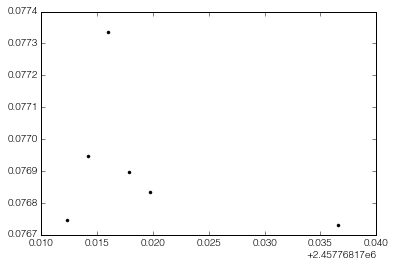

In [72]:
g = df.groupby(['Label','filt'])
df2 = g.first()
df2_gp = df2.query('filt=="gp"') 
df2_ip = df2.query('filt=="ip"') 

plot(df2_gp.JD_UTC,df2_gp.rel_flux_T1,'.')

#df2 = g.last()
#df2_gp = df2.query('filt=="gp"') 
#plot(df2_gp.JD_UTC,df2_gp.rel_flux_T1,'.')